In [198]:
import pandas as pd

In [199]:
df = pd.read_csv('/content/drive/MyDrive/INST414/teens_killed_by_gun_violence_2024.csv')

In [200]:
# filter columns
df = df[['State','City Or County']]

In [201]:
# rename "City or County" column to "Cities"
df.columns = ['State', 'Cities']

# Remove rows where "Cities" contains parentheses (which are counties)
df = df[~df["Cities"].str.contains(r"\(.*\)", regex=True)]

# Combine both columns into one
df["U.S. City"] = df["Cities"] + ", "+ df["State"]
df = df[["U.S. City"]]

# Aggregate by how mnay times each U.S city appears in the dataframe
result = df.groupby("U.S. City").size()

# Display the 5 largest elements/top 5 cities
top_5_cities = result.nlargest(5).reset_index()
# Rename the second column
top_5_cities.rename(columns={0: "Number of Teens Killed by Gun Violence in 2024"}, inplace=True)

# Top 30 Cities
top_30_cities = result.nlargest(30).reset_index()
top_30_cities.rename(columns={0: "Number of Teens Killed by Gun Violence in 2024"}, inplace=True)

# Display the result as a table
top_5_cities

,U.S. City,Number of Teens Killed by Gun Violence in 2024
0,"Chicago, Illinois",47
1,"Houston, Texas",34
2,"Milwaukee, Wisconsin",24
3,"Saint Louis, Missouri",19
4,"Philadelphia, Pennsylvania",18


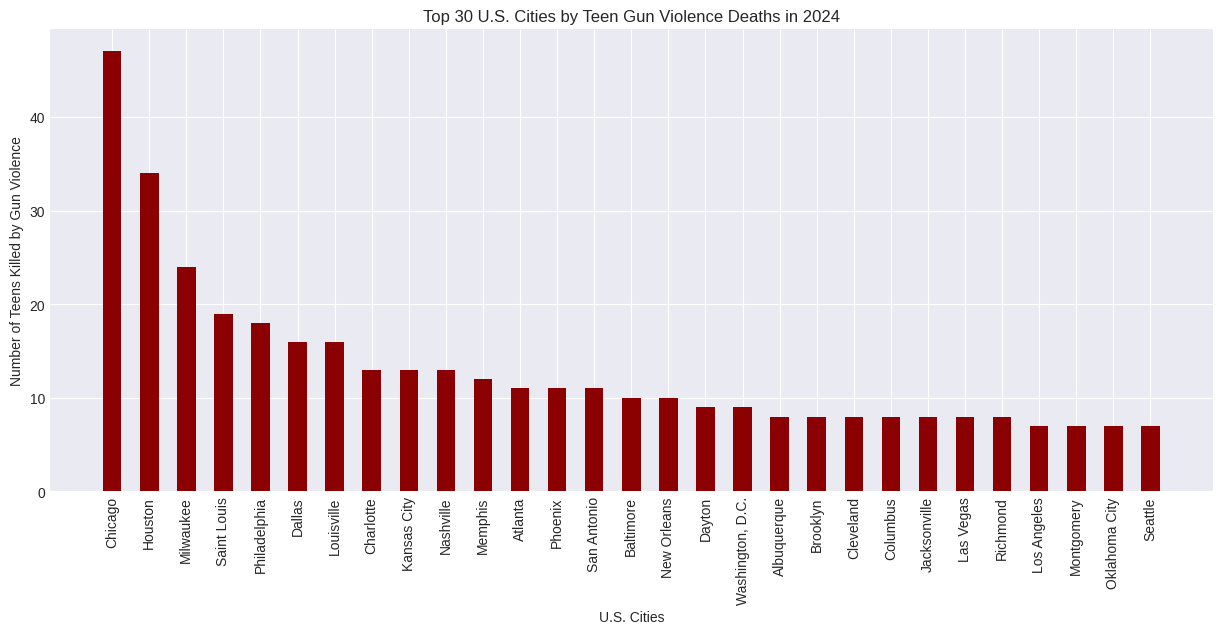

In [202]:
import matplotlib.pyplot as plt

def get_city(city_state):
    city_name = city_state.split(",")[0]
    if city_name == "Washington":
      city_name = "Washington, D.C."
    return city_name

# Extract city names and values
x = top_30_cities["U.S. City"].apply(lambda x: get_city(x))
y = top_30_cities["Number of Teens Killed by Gun Violence in 2024"]
plt.figure(figsize=(15, 6))
# Create bar chart with smaller width for more spacing
plt.bar(x, y, color="darkred", width=0.5)
plt.xlabel("U.S. Cities")
plt.ylabel("Number of Teens Killed by Gun Violence")
plt.title("Top 30 U.S. Cities by Teen Gun Violence Deaths in 2024")
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()